In [2]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
cond = df['Species'].isin(['Bream', 'Smelt'])

In [7]:
fish_data = df.loc[cond, ['Length2', 'Weight']]

In [8]:
fish_target = df.loc[cond, ['Species']]

In [10]:
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [12]:
from sklearn.model_selection import train_test_split

In [42]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
kn = KNeighborsClassifier()

In [51]:
kn.fit(train_input, train_target['Species'])

KNeighborsClassifier()

In [53]:
kn.score(test_input, test_target)

1.0

In [78]:
kn.predict([[25, 150]])

C:\Users\2-00\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

In [83]:
test_dict = {
    'Length2': 25,
    'Weight': 200,
}
test_df = pd.DataFrame(test_dict, index=[0])
# test_df
kn.predict(test_df)

array(['Bream'], dtype=object)

In [75]:
import matplotlib.pyplot as plt

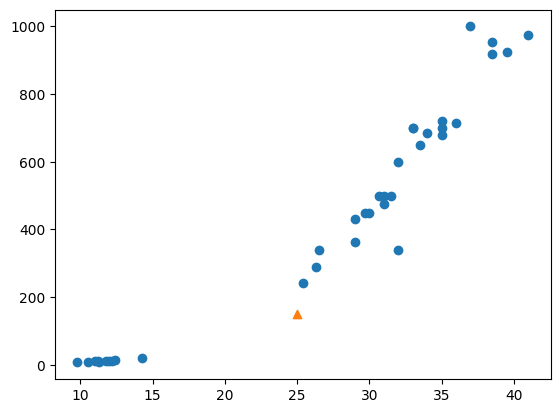

In [77]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(25, 150, marker='^')
plt.show()

In [88]:
distance, indexes = kn.kneighbors([[25, 150]])

C:\Users\2-00\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [89]:
indexes

array([[11, 20, 13, 22, 15]])

In [95]:
n_df = train_input.iloc[indexes[0]]

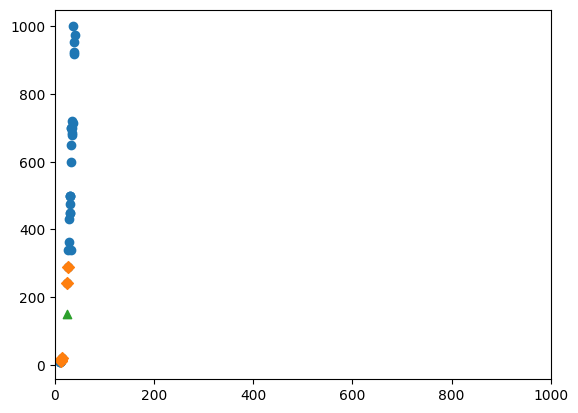

In [97]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker='D')
plt.scatter(25, 150, marker='^')
plt.xlim(0, 1000)
plt.show()

- 표준점수

```
(데이터 - 평균) / 표준편차 
```

In [101]:
mean = train_input.mean()

In [102]:
std = train_input.std()

In [104]:
train_input.head()

,Length2,Weight
26,35.0,720.0
3,29.0,363.0
150,11.3,8.7
9,30.7,500.0
149,11.2,9.8


In [105]:
(train_input - mean).head()

,Length2,Weight
26,8.066667,278.016667
3,2.066667,-78.983333
150,-15.633333,-433.283333
9,3.766667,58.016667
149,-15.733333,-432.183333


In [107]:
train_scaled = ((train_input - mean) / std)

In [110]:
new = ([25, 150] - mean) / std
new

Length2   -0.188902
Weight    -0.884177
dtype: float64

In [114]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [115]:
test_scaled = (test_input - mean) / std

In [117]:
kn.score(test_scaled, test_target)

1.0

In [121]:
kn.predict([new])

C:\Users\2-00\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

## 펭귄데이터 연습

In [124]:
import seaborn as sns

In [125]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [129]:
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [131]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [134]:
df.groupby('species').mean(numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


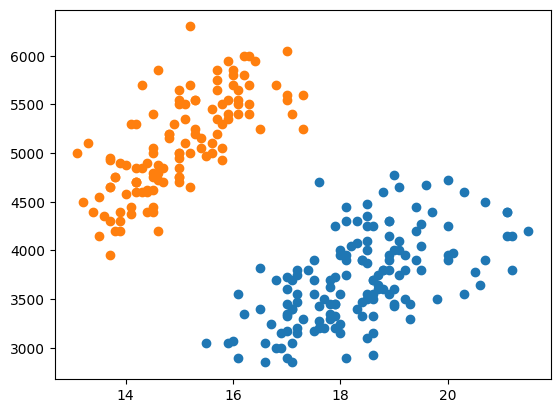

In [142]:
import matplotlib.pyplot as plt

cond_adel = df['species'] == 'Adelie'
# cond_chin = df['species'] == 'Chinstrap'
cond_gent = df['species'] == 'Gentoo'

plt.scatter(df.loc[cond_adel, 'bill_depth_mm'], df.loc[cond_adel, 'body_mass_g'])
plt.scatter(df.loc[cond_gent, 'bill_depth_mm'], df.loc[cond_gent, 'body_mass_g'])
# plt.scatter()
plt.show()

In [144]:
cond = df['species'].isin(['Adelie', 'Gentoo'])
pg_data = df.loc[cond, ['bill_depth_mm', 'body_mass_g']]
# pg_data.head()

In [145]:
pg_target = df.loc[cond, ['species']]

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
train_input, test_input, train_target, test_target = train_test_split(
    pg_data, pg_target, stratify=pg_target)

In [149]:
kn.fit(train_input, train_target['species'])

KNeighborsClassifier()

In [150]:
kn.score(test_input, test_target['species'])

0.9253731343283582

In [152]:
mean = train_input.mean()
std = train_input.std()

In [154]:
train_scaled = (train_input - mean) / std

In [155]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [157]:
 test_scaled = (test_input - mean) / std

In [158]:
kn.score(test_scaled, test_target)

1.0